In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [11]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ab_edited.csv')
data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
data['date'] = pd.DatetimeIndex(data['timestamp']).date

In [ ]:
#Check for adequate sample sizes.

In [12]:
print('The size of the control group is: ', len(data[data.group == 'control']))
print('The size of the treatment group is: ', len(data[data.group == 'treatment']))
print('The test proportion size is: ', data.converted.mean())

The size of the control group is:  145274
The size of the treatment group is:  145311
The test proportion size is:  0.11959667567149027


In [ ]:
# What is the signup rate of test and control?

In [14]:
print('The test signup rate is: ', data[data.group == 'treatment'].converted.mean())
print('The control signup rate is: ', data[data.group == 'control'].converted.mean())

The test signup rate is:  0.11880724790277405
The control signup rate is:  0.1203863045004612


In [ ]:
# Are the test and control groups significantly different?

In [15]:
stats.ttest_ind(data[data.group == 'treatment'].converted,
                data[data.group == 'control'].converted)

Ttest_indResult(statistic=-1.3116069027036805, pvalue=0.18965383906859376)

In [ ]:
#Check for changes over time in results.

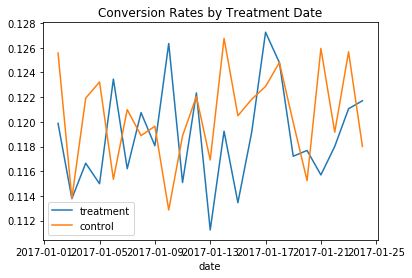

In [20]:
figure = data[data.group == 'treatment'][['date', 'converted']].groupby('date').mean().plot()
data[data.group == 'control'][['date', 'converted']].groupby('date').mean().plot(ax=figure)
plt.legend(['treatment','control'])
plt.title('Conversion Rates by Treatment Date')
plt.show()


In [ ]:
#Formally test for a significant difference in conversions between treatment and control groups.

In [21]:
print('T-Test Results by Date')
for day in data.date.unique():
    dated_data = data[data.date == day]
    print(stats.ttest_ind(dated_data[dated_data.group == 'treatment'].converted,
                          dated_data[dated_data.group == 'control'].converted))

T-Test Results by Date
Ttest_indResult(statistic=-1.8123288054674913, pvalue=0.0699579338988825)
Ttest_indResult(statistic=0.05182821974845549, pvalue=0.9586663564605943)
Ttest_indResult(statistic=-0.6795024407954999, pvalue=0.49683133482307695)
Ttest_indResult(statistic=0.33111903181744556, pvalue=0.7405597598504309)
Ttest_indResult(statistic=2.3999515991310387, pvalue=0.01641085244784032)
Ttest_indResult(statistic=-0.4836129647924235, pvalue=0.628668638020595)
Ttest_indResult(statistic=0.7611804663738991, pvalue=0.446562930057432)
Ttest_indResult(statistic=-0.9315635899845935, pvalue=0.3515792521983202)
Ttest_indResult(statistic=-1.261388402374626, pvalue=0.20719113309271808)
Ttest_indResult(statistic=-0.0026642818202597274, pvalue=0.9978742538059032)
Ttest_indResult(statistic=-0.28071255594768935, pvalue=0.7789352633524722)
Ttest_indResult(statistic=-0.2056136446252576, pvalue=0.837095874040602)
Ttest_indResult(statistic=0.4909032980527966, pvalue=0.6235093367111435)
Ttest_indResult